# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

# Highlights of The New York Times Bestselling List

In [1]:
library('tidyverse')
library('ggrepel')

nyt_titles = readr::read_tsv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-10/nyt_titles.tsv')

head(nyt_titles)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”
Rows: 7431 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): title, author
dbl  (5): id, year, total_weeks, debut_rank, best_rank
date (1): first_week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,title,author,year,total_weeks,first_week,debut_rank,best_rank
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
0,"""H"" IS FOR HOMICIDE",Sue Grafton,1991,15,1991-05-05,1,2
1,"""I"" IS FOR INNOCENT",Sue Grafton,1992,11,1992-04-26,14,2
10,''G'' IS FOR GUMSHOE,Sue Grafton,1990,6,1990-05-06,4,8
100,A DOG'S JOURNEY,W. Bruce Cameron,2012,1,2012-05-27,3,14
1000,CHANGING FACES,Kimberla Lawson Roby,2006,1,2006-02-19,11,14
1001,CHAOS,Patricia Cornwell,2016,3,2016-12-04,1,7


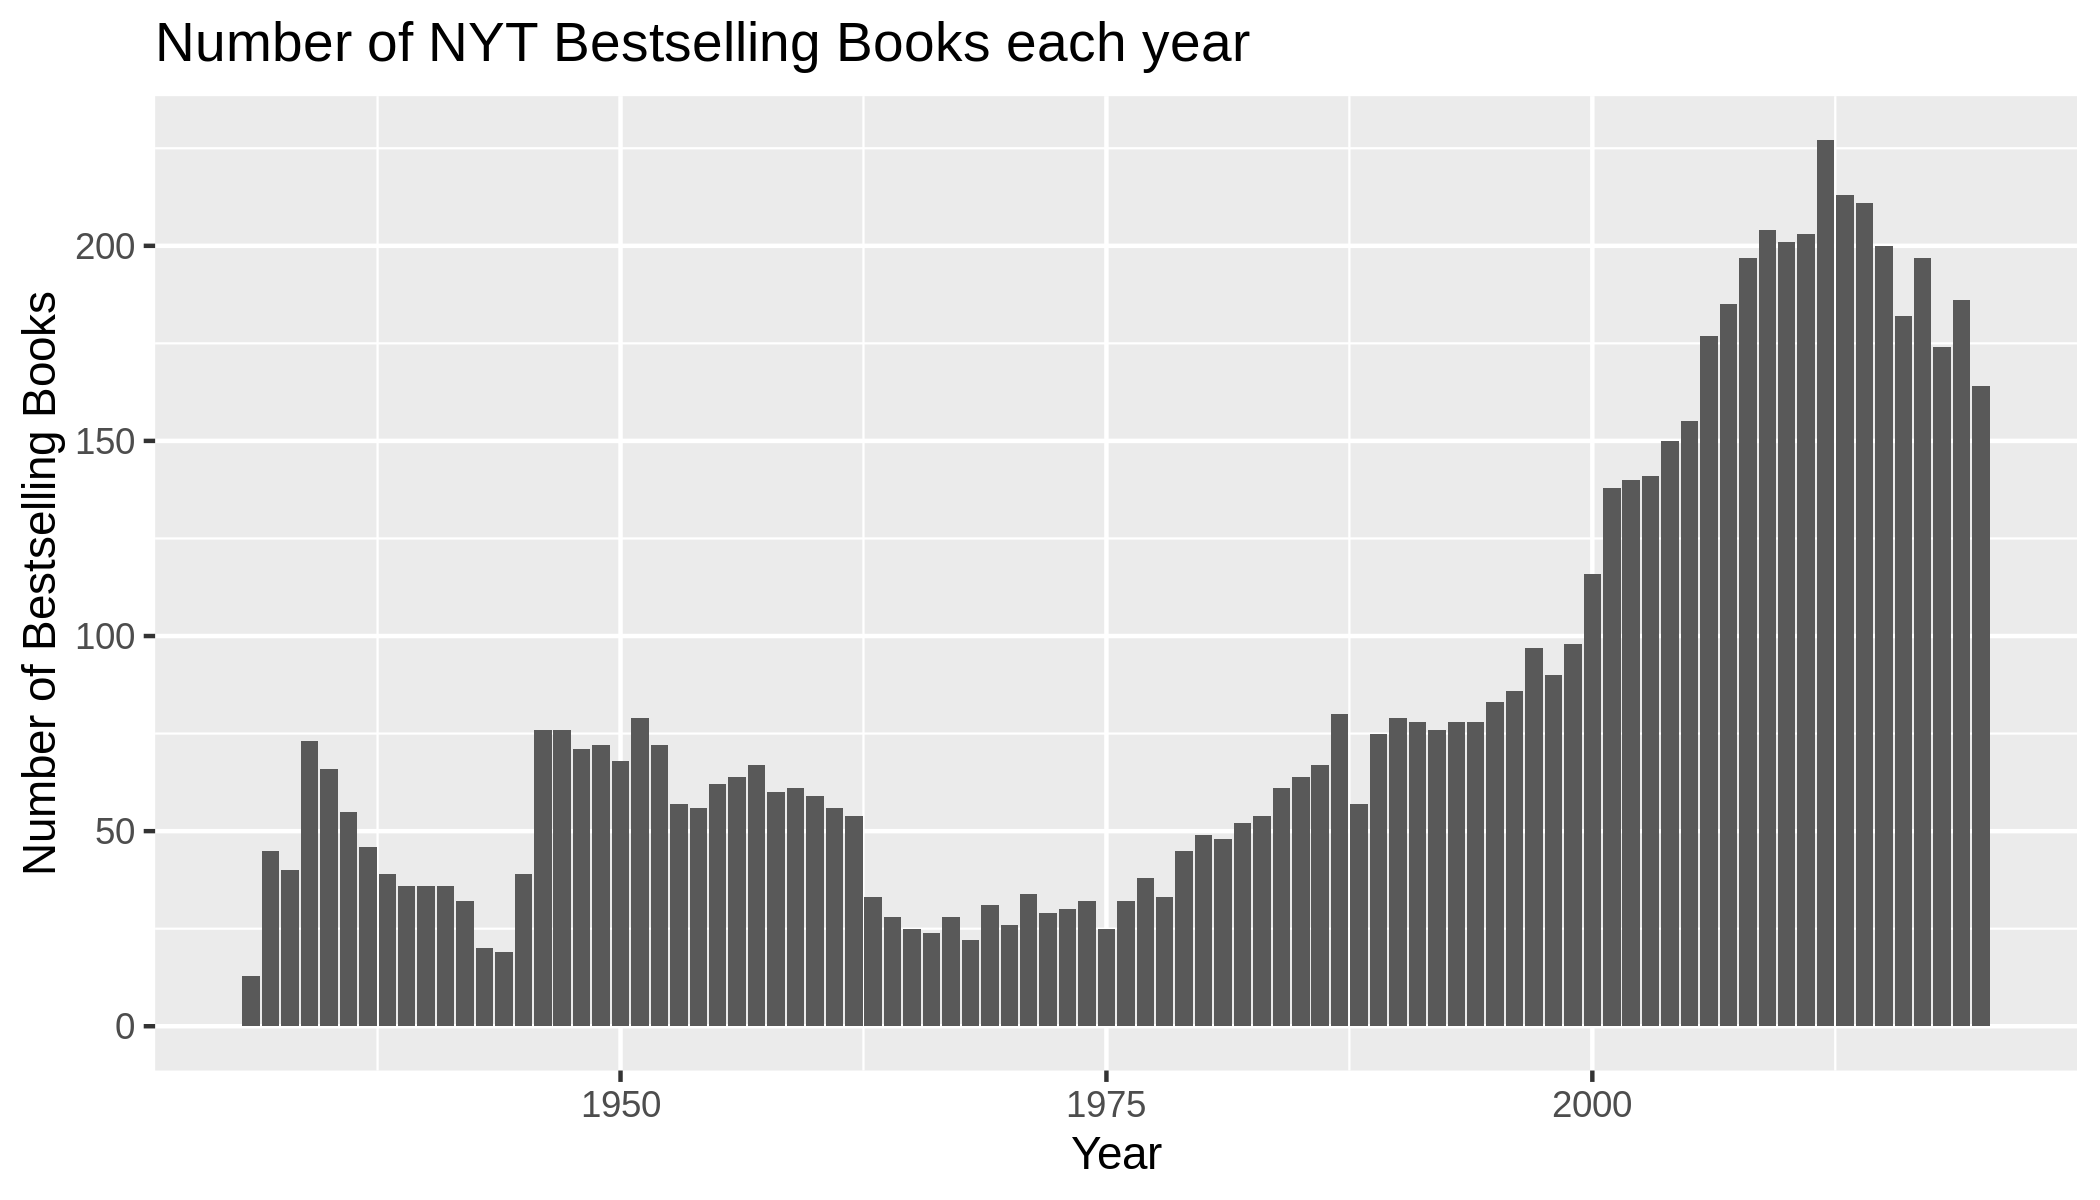

In [2]:
options(repr.plot.width=7, repr.plot.height=4)

titles2 = nyt_titles

p = ggplot(data = titles2, mapping = aes(x = year)) +
    geom_bar() +
    labs(x = 'Year', y = 'Number of Bestselling Books', title = 'Number of NYT Bestselling Books each year')
p

## For `p` I made a bar chart of the number of bestelling books on the NYT Bestsellers list over time.

The number of books on the NYT Bestseller list has increased over time with the last two decades yeilding the most bestselling books since the bestseller list began in 1931. I am not surprised that the bestseller list has grown over time because I assume it has grown along with the publisher. Has population driven the sharp increase in book sales? Or are book sales more afffected by the availability of digitial copies and audiobooks? Also, it is interesting that there have been a couple of steep drops in the number of bestsellers just before 1950 and around 1960.

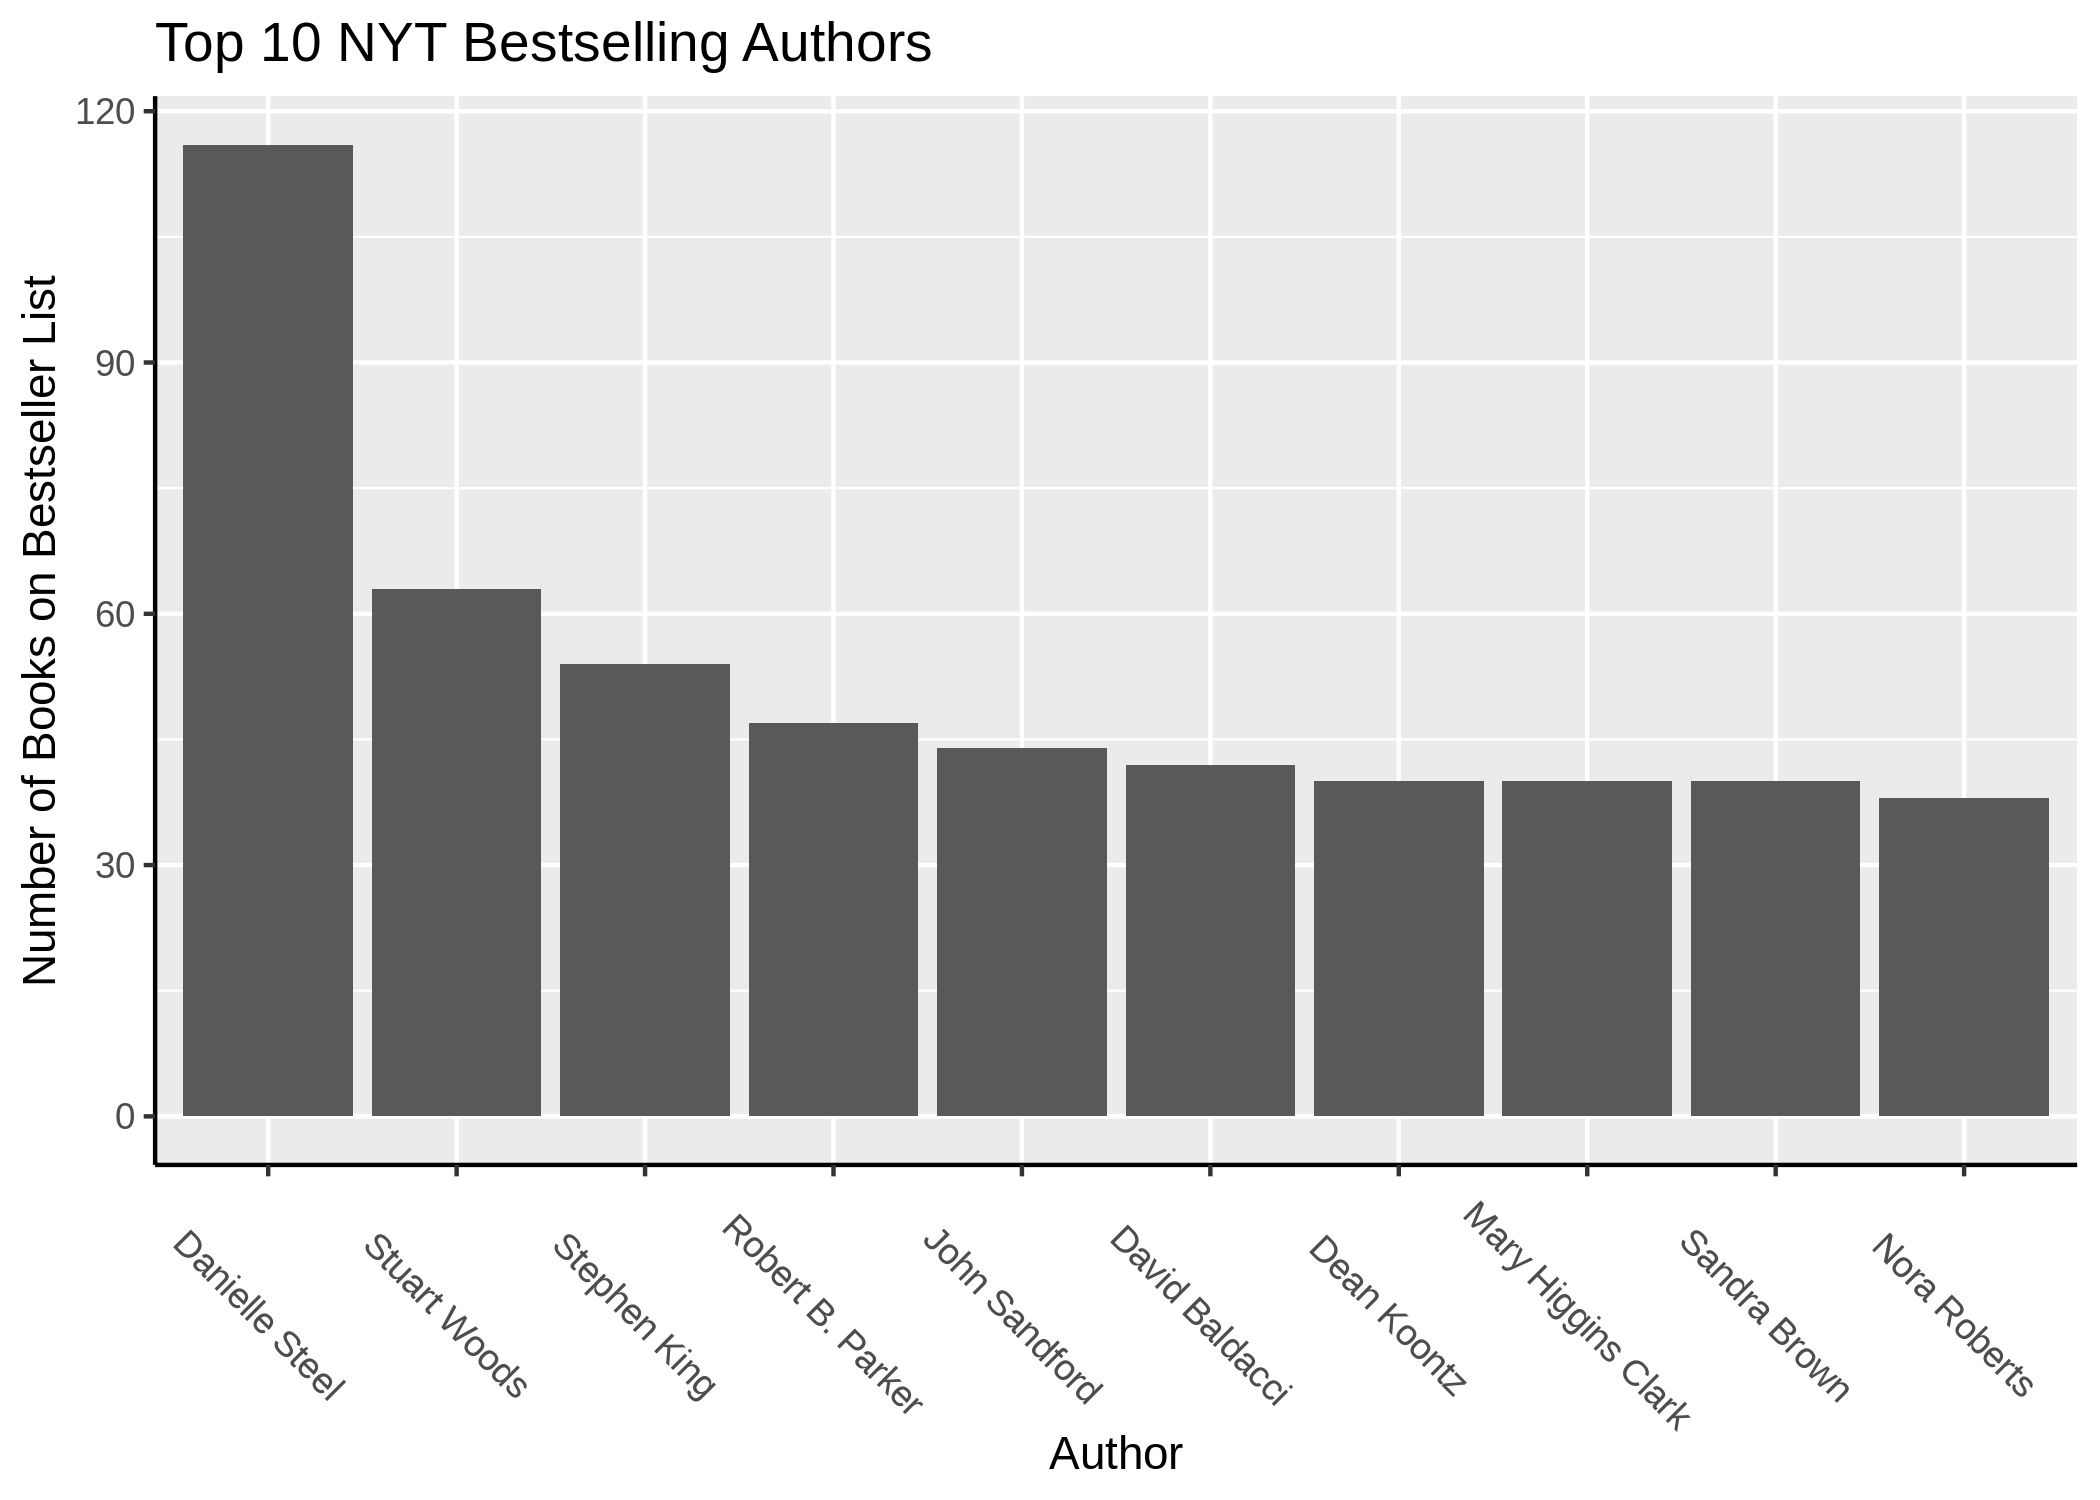

In [3]:
options(repr.plot.width=7, repr.plot.height=5)

top_authors = nyt_titles |>
    group_by(author) |>
    summarize(N = n()) |>
    arrange(desc(N)) |>
    slice_head(n=10)

top_ten_authors = nyt_titles |>
    mutate(author = fct_lump_n(author, n=10) |> fct_infreq()) |>
    filter(author != "Other")


p2 = ggplot(data = top_ten_authors, mapping = aes(x=author)) +
    geom_bar() +
    labs(y = 'Number of Books on Bestseller List', x = 'Author', title = 'Top 10 NYT Bestselling Authors') +
    theme(axis.line = element_line(), axis.text.x=element_text(angle=-45))

p2

## For `p2` I made a chart of the top ten New York Times bestelling authors of all time. 

This bar chart shows the same information as the table. Danielle Steel clearly has the most bestselling books followed by Stuart Woods as the second author with the most bestselling books. The rest of the authors have very similar numbers but Stephen King has the third most books on the bestelling list (and is the only author that I recognize). 


### Below is a table that shows the same information with more detail.

In [4]:
top_ten_authors = nyt_titles |>
    group_by(author) |>
    summarize(N = n()) |>
    arrange(desc(N)) |>
    slice_head(n=10)

top_ten_authors

author,N
<chr>,<int>
Danielle Steel,116
Stuart Woods,63
Stephen King,54
Robert B. Parker,47
John Sandford,44
David Baldacci,42
Dean Koontz,40
Mary Higgins Clark,40
Sandra Brown,40


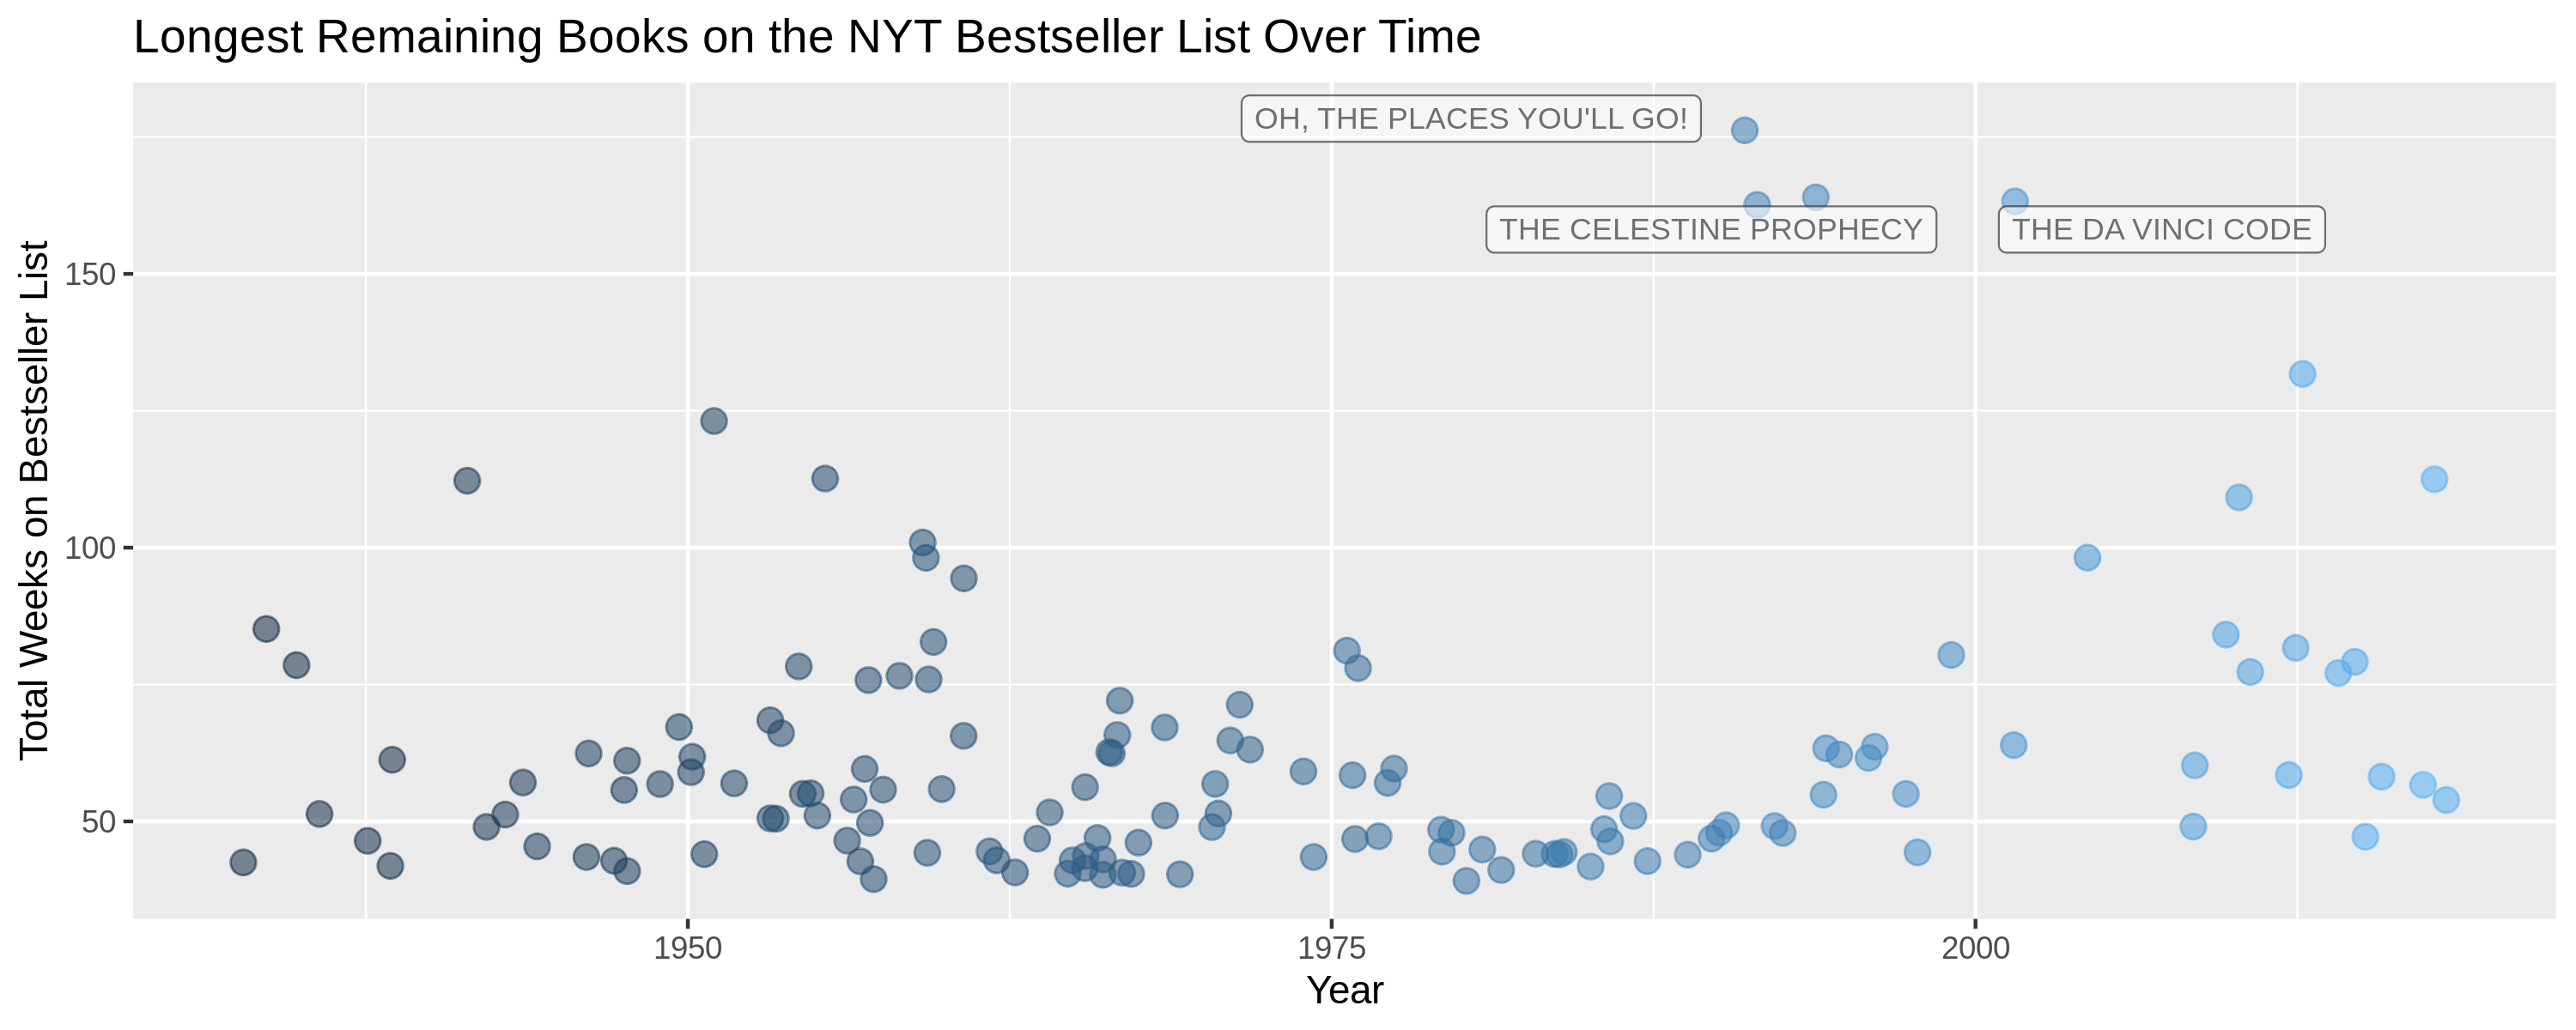

In [5]:
options(repr.plot.width=10, repr.plot.height=4)

auth_labels = nyt_titles |>
    slice_max(total_weeks, n=3)

popular_titles = nyt_titles |>
    filter( total_weeks > 40 )

p3 = ggplot(data = popular_titles, mapping = aes(y = total_weeks, x = year, alpha = 0.5, color = year, show.legend = )) +
    geom_point(size = 3, position = position_jitter(height = 2, width = 2)) +
    theme(legend.position = 'none') +
    labs(y='Total Weeks on Bestseller List', x='Year', title='Longest Remaining Books on the NYT Bestseller List Over Time') +
    geom_label_repel(data = auth_labels,
                        direction = 'both',
                        aes(label = title), 
                        color = 'black', size = 3)
            
p3

## For `p3` I created a scatterplot showing all of the bestsellers that remained on the NYT Bestseller list for over 40 weeks total.

After filtering out the books that remained on the NYT Bestseller list for 40 weeks or less the graph shows that the longest running bestsellers all entered the list around 1990 whereas most other books did not remain on the NYT bestsellers list for longer than 80 weeks. "Oh The Places You'll Go!" was the book that remained on the bestsellers list the longest and "The Da Vinci Code" was the third longest-running bestseller on the NYT Bestsellers list. 